# Working with 10-K Data

In [1]:
#import edgar
#This module pulls the SEC files for companies

#Pick the company
#company = edgar.Company("Oracle Corp", "0001341439")

#Get the filings, in this case the 10K
#tree = company.get_all_filings(filingType = "10-K")

#Pull the latest 5 documents
#docs = edgar.getDocuments(tree, noOfDocuments=5)

from edgar import Company
company = Company("Oracle Corp", "0001341439")
tree = company.get_all_filings(filing_type = "10-K")
docs = Company.get_documents(tree, no_of_documents=5)


In [5]:
#Let's see the first document
sample_text = docs[0]
print(sample_text)

IndexError: list index out of range

In [90]:
import re
#Using regular expressions we can find the places where Item 1A. is referenced, the risk section
#Notice the backlash has to be used for the period to escape it
#There are two places we find it, the table of contents and the header
print(re.findall(re.compile('Item 1A\.'),sample_text))

['Item 1A.', 'Item 1A.']


In [91]:
#A better way is to search and find the elements. This will give location as well as matched string
for match in re.finditer('Item 1A\.', sample_text):
    print(match)

<_sre.SRE_Match object; span=(4776, 4784), match='Item 1A.'>
<_sre.SRE_Match object; span=(66657, 66665), match='Item 1A.'>


In [92]:
#We can grab the span as so
print(match.span())

(66657, 66665)


In [93]:
#We can also generalize the regular expression to all items
matches = list(re.finditer(re.compile('Item [0-9][A-Z]*\.'), sample_text))
print(matches)

[<_sre.SRE_Match object; span=(4776, 4784), match='Item 1A.'>, <_sre.SRE_Match object; span=(4816, 4824), match='Item 1B.'>, <_sre.SRE_Match object; span=(4869, 4876), match='Item 2.'>, <_sre.SRE_Match object; span=(4906, 4913), match='Item 3.'>, <_sre.SRE_Match object; span=(4950, 4957), match='Item 4.'>, <_sre.SRE_Match object; span=(5025, 5032), match='Item 5.'>, <_sre.SRE_Match object; span=(5160, 5167), match='Item 6.'>, <_sre.SRE_Match object; span=(5210, 5217), match='Item 7.'>, <_sre.SRE_Match object; span=(5322, 5330), match='Item 7A.'>, <_sre.SRE_Match object; span=(5408, 5415), match='Item 8.'>, <_sre.SRE_Match object; span=(5478, 5485), match='Item 9.'>, <_sre.SRE_Match object; span=(5589, 5597), match='Item 9A.'>, <_sre.SRE_Match object; span=(5640, 5648), match='Item 9B.'>, <_sre.SRE_Match object; span=(66657, 66665), match='Item 1A.'>, <_sre.SRE_Match object; span=(147134, 147142), match='Item 1B.'>, <_sre.SRE_Match object; span=(148244, 148251), match='Item 3.'>, <_sre.

In [94]:
#The first index of the mathces will be the actual string
print(matches[0][0])

Item 1A.


In [95]:
#Let's find all matches for Item 1A.
item_matches = [i for i in range(len(matches)) if matches[i][0] == 'Item 1A.']
print(item_matches)

[0, 13]


In [96]:
#We'll take the latest index as the start of the actual section
start = max(item_matches)
#And the end will be the index after
end = start+1

In [97]:
#Let's also get the end span of the first item and the beginning of the span for the second one to find the text between
start = matches[start].span()[1]
end = matches[end].span()[0]
print(start)
print(end)

66665
147134


In [98]:
#And let's inspect the actual text
print(sample_text[start:end])

    Risk
Factors  We operate in rapidly changing economic and technological environments that present numerous risks, many of which are driven by
factors that we cannot control or predict. The following discussion, as well as our Critical Accounting Policies and Estimates discussion in Managements Discussion and Analysis of Financial Condition and Results of Operations (Item
7), highlights some of these risks. The risks described below are not exhaustive and you should carefully consider these risks and uncertainties before investing in our securities. 
Our Oracle Cloud strategy, including our Oracle Software as a Service (SaaS), Platform as a Service (PaaS), Infrastructure as a Service (IaaS)
and Data as a Service (DaaS) offerings, may adversely affect our revenues and profitability.    We provide our cloud and other offerings to customers worldwide via deployment models that best suit their needs, including
via our cloud-based SaaS, PaaS, IaaS and DaaS offerings. As these business

In [99]:
#Now put it in a function
def pull_risk_section(text):
    matches = list(re.finditer(re.compile('Item [0-9][A-Z]*\.'), text))
    start = max([i for i in range(len(matches)) if matches[i][0] == 'Item 1A.'])
    end = start+1
    start = matches[start].span()[1]
    end = matches[end].span()[0]
    return text[start:end]
print(pull_risk_section(sample_text))

    Risk
Factors  We operate in rapidly changing economic and technological environments that present numerous risks, many of which are driven by
factors that we cannot control or predict. The following discussion, as well as our Critical Accounting Policies and Estimates discussion in Managements Discussion and Analysis of Financial Condition and Results of Operations (Item
7), highlights some of these risks. The risks described below are not exhaustive and you should carefully consider these risks and uncertainties before investing in our securities. 
Our Oracle Cloud strategy, including our Oracle Software as a Service (SaaS), Platform as a Service (PaaS), Infrastructure as a Service (IaaS)
and Data as a Service (DaaS) offerings, may adversely affect our revenues and profitability.    We provide our cloud and other offerings to customers worldwide via deployment models that best suit their needs, including
via our cloud-based SaaS, PaaS, IaaS and DaaS offerings. As these business

In [100]:
#We also want to get rid of any unneeded characters
def pull_risk_section(text):
    text = re.sub('\n', ' ', text)
    text = re.sub('\xa0', ' ', text)
    matches = list(re.finditer(re.compile('Item [0-9][A-Z]*\.'), text))
    start = max([i for i in range(len(matches)) if matches[i][0] == 'Item 1A.'])
    end = start+1
    start = matches[start].span()[1]
    end = matches[end].span()[0]
    text = text[start:end]
    return text
risk_section = pull_risk_section(sample_text)
print(risk_section)

    Risk Factors  We operate in rapidly changing economic and technological environments that present numerous risks, many of which are driven by factors that we cannot control or predict. The following discussion, as well as our Critical Accounting Policies and Estimates discussion in Managements Discussion and Analysis of Financial Condition and Results of Operations (Item 7), highlights some of these risks. The risks described below are not exhaustive and you should carefully consider these risks and uncertainties before investing in our securities.  Our Oracle Cloud strategy, including our Oracle Software as a Service (SaaS), Platform as a Service (PaaS), Infrastructure as a Service (IaaS) and Data as a Service (DaaS) offerings, may adversely affect our revenues and profitability.    We provide our cloud and other offerings to customers worldwide via deployment models that best suit their needs, including via our cloud-based SaaS, PaaS, IaaS and DaaS offerings. As these business

In [101]:
#Let's also make a function for pulling the 10-Ks
def pull_10K(company_name, company_id):
    company = edgar.Company(company_name, company_id)
    tree = company.getAllFilings(filingType = "10-K")
    docs = edgar.getDocuments(tree, noOfDocuments=5)
    return docs
documents = pull_10K("Oracle Corp", "0001341439")
print(documents[0])


10-K
1
d568983d10k.htm
10-K


10-K

 
Table of Contents

Index to Financial Statements

  
  UNITED STATES 
SECURITIES AND EXCHANGE COMMISSION 
Washington, D.C. 20549   
  FORM 10-K 
 












☒
 
 ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF
THE SECURITIES EXCHANGE ACT OF 1934
 

 For the fiscal year ended May 31, 2018 
OR   












☐
 
 TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF
THE SECURITIES EXCHANGE ACT OF 1934
 

 For the transition period from              to
               Commission File Number: 001-35992 
   
Oracle Corporation  (Exact name of
registrant as specified in its charter)   










Delaware
 
54-2185193

 (State or other jurisdiction of
incorporation or organization)
 
 (I.R.S. Employer
Identification No.)




500 Oracle Parkway
 


Redwood City, California
 
94065

(Address of principal executive offices)
 
(Zip Code)
 (650) 506-7000 
(Registrants telephone number, including area code) 
Securities registered pursuant to Section 12(b) of

In [102]:
#Let's see the functions in action
documents = pull_10K("Oracle Corp", "0001341439")
risk_sections = [pull_risk_section(document) for document in documents]
print(risk_sections[0])

    Risk Factors  We operate in rapidly changing economic and technological environments that present numerous risks, many of which are driven by factors that we cannot control or predict. The following discussion, as well as our Critical Accounting Policies and Estimates discussion in Managements Discussion and Analysis of Financial Condition and Results of Operations (Item 7), highlights some of these risks. The risks described below are not exhaustive and you should carefully consider these risks and uncertainties before investing in our securities.  Our Oracle Cloud strategy, including our Oracle Software as a Service (SaaS), Platform as a Service (PaaS), Infrastructure as a Service (IaaS) and Data as a Service (DaaS) offerings, may adversely affect our revenues and profitability.    We provide our cloud and other offerings to customers worldwide via deployment models that best suit their needs, including via our cloud-based SaaS, PaaS, IaaS and DaaS offerings. As these business

In [103]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

#Let's grab word counts like we did prior
stemmer = nltk.stem.SnowballStemmer('english')
risk_sections = [stemmer.stem(risk_section) for risk_section in risk_sections]
vectorizer = CountVectorizer(stop_words='english')
counts = vectorizer.fit_transform(risk_sections)
counts = pd.DataFrame(counts.toarray(),columns=vectorizer.get_feature_names()).transpose()
counts.columns = [2018,2017,2016,2015,2014]
print(counts)

             2018  2017  2016  2015  2014
12              0     1     0     0     0
14              1     0     0     0     0
15              1     0     0     0     0
16              1     0     0     0     0
17              2     0     0     0     0
18              1     1     1     1     2
19              1     0     0     1     1
20              1     0     0     1     1
2013            0     0     0     0     1
2014            0     0     0     0     3
2015            1     2     2     4     0
2016            2     2     3     1     0
2017            1     3     0     0     0
2018            7     1     0     0     0
2040            0     0     0     0     1
2055            1     1     1     1     0
21              1     0     1     1     1
22              1     1     1     1     1
23              1     1     1     1     1
24              2     1     1     1     2
25              1     1     1     1     1
26              1     1     1     1     1
27              1     1     1     

In [104]:
#In this case we don't need to turn it into frequency if we want to also penalize for different length risk sections
print(sum((counts[2018]-counts[2017])**2)**.5)

74.92663077971676


In [105]:
#We can apply the difference in a horizontal manner
print(counts.diff(axis=1).dropna(axis=1))

             2017  2016  2015  2014
12            1.0  -1.0   0.0   0.0
14           -1.0   0.0   0.0   0.0
15           -1.0   0.0   0.0   0.0
16           -1.0   0.0   0.0   0.0
17           -2.0   0.0   0.0   0.0
18            0.0   0.0   0.0   1.0
19           -1.0   0.0   1.0   0.0
20           -1.0   0.0   1.0   0.0
2013          0.0   0.0   0.0   1.0
2014          0.0   0.0   0.0   3.0
2015          1.0   0.0   2.0  -4.0
2016          0.0   1.0  -2.0  -1.0
2017          2.0  -3.0   0.0   0.0
2018         -6.0  -1.0   0.0   0.0
2040          0.0   0.0   0.0   1.0
2055          0.0   0.0   0.0  -1.0
21           -1.0   1.0   0.0   0.0
22            0.0   0.0   0.0   0.0
23            0.0   0.0   0.0   0.0
24           -1.0   0.0   0.0   1.0
25            0.0   0.0   0.0   0.0
26            0.0   0.0   0.0   0.0
27            0.0   0.0   0.0   0.0
28            0.0   0.0   0.0   0.0
29            0.0   0.0   0.0   0.0
30           -1.0   0.0   0.0   0.0
31            0.0   0.0   0.

In [106]:
#And then get the distance
print((counts.diff(axis=1).dropna(axis=1)**2).sum()**.5)

2017    74.926631
2016    26.981475
2015    60.415230
2014    44.283180
dtype: float64


In [107]:
#Create a function for the distance
def find_distance(risk_sections):
    stemmer = nltk.stem.SnowballStemmer('english')
    risk_sections = [stemmer.stem(risk_section) for risk_section in risk_sections]
    vectorizer = CountVectorizer(stop_words='english')
    counts = vectorizer.fit_transform(risk_sections)
    counts = pd.DataFrame(counts.toarray(),columns=vectorizer.get_feature_names()).transpose()
    counts.columns = [2018,2017,2016,2015,2014]
    return (counts.diff(axis=1).dropna(axis=1)**2).sum()**.5
print(find_distance(risk_sections))

2017    74.926631
2016    26.981475
2015    60.415230
2014    44.283180
dtype: float64


# Applications of TF-IDF

In [108]:
import numpy as np
#One thing we can do is take the log of the number of terms
tf_log = np.log(1 + counts)
print(tf_log)

                 2018      2017      2016      2015      2014
12           0.000000  0.693147  0.000000  0.000000  0.000000
14           0.693147  0.000000  0.000000  0.000000  0.000000
15           0.693147  0.000000  0.000000  0.000000  0.000000
16           0.693147  0.000000  0.000000  0.000000  0.000000
17           1.098612  0.000000  0.000000  0.000000  0.000000
18           0.693147  0.693147  0.693147  0.693147  1.098612
19           0.693147  0.000000  0.000000  0.693147  0.693147
20           0.693147  0.000000  0.000000  0.693147  0.693147
2013         0.000000  0.000000  0.000000  0.000000  0.693147
2014         0.000000  0.000000  0.000000  0.000000  1.386294
2015         0.693147  1.098612  1.098612  1.609438  0.000000
2016         1.098612  1.098612  1.386294  0.693147  0.000000
2017         0.693147  1.386294  0.000000  0.000000  0.000000
2018         2.079442  0.693147  0.000000  0.000000  0.000000
2040         0.000000  0.000000  0.000000  0.000000  0.693147
2055    

In [109]:
#Inverse Document Frequency

#First find the number of documents with each term
n = (counts > 0).sum(axis=1)

#Then divide that by total number of documents and take the log of it
idf = np.log(5 / n)
print(idf)

12             1.609438
14             1.609438
15             1.609438
16             1.609438
17             1.609438
18             0.000000
19             0.510826
20             0.510826
2013           1.609438
2014           1.609438
2015           0.223144
2016           0.223144
2017           0.916291
2018           0.916291
2040           1.609438
2055           0.223144
21             0.223144
22             0.000000
23             0.000000
24             0.000000
25             0.000000
26             0.000000
27             0.000000
28             0.000000
29             0.000000
30             0.000000
31             0.000000
32             0.510826
33             0.916291
34             0.916291
                 ...   
warehouse      1.609438
warned         0.223144
warrant        0.000000
warranty       0.000000
waste          0.000000
way            0.000000
ways           0.223144
weaken         0.000000
weakening      0.000000
weakens        0.000000
website        1

In [110]:
tf_idf = tf_log.multiply(idf, axis=0)
print(tf_idf)

                 2018      2017      2016      2015      2014
12           0.000000  1.115577  0.000000  0.000000  0.000000
14           1.115577  0.000000  0.000000  0.000000  0.000000
15           1.115577  0.000000  0.000000  0.000000  0.000000
16           1.115577  0.000000  0.000000  0.000000  0.000000
17           1.768148  0.000000  0.000000  0.000000  0.000000
18           0.000000  0.000000  0.000000  0.000000  0.000000
19           0.354077  0.000000  0.000000  0.354077  0.354077
20           0.354077  0.000000  0.000000  0.354077  0.354077
2013         0.000000  0.000000  0.000000  0.000000  1.115577
2014         0.000000  0.000000  0.000000  0.000000  2.231155
2015         0.154671  0.245148  0.245148  0.359136  0.000000
2016         0.245148  0.245148  0.309343  0.154671  0.000000
2017         0.635124  1.270249  0.000000  0.000000  0.000000
2018         1.905373  0.635124  0.000000  0.000000  0.000000
2040         0.000000  0.000000  0.000000  0.000000  1.115577
2055    

In [111]:
#Now we want to try cosine similarity to compare
#Notice the interesting pattern here of similarity getting smaller and smaller as the years are farther apart
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(tf_idf.transpose())
similarity = pd.DataFrame(similarity, index=[2018,2017,2016,2015,2014],columns=[2018,2017,2016,2015,2014])
print(similarity)

          2018      2017      2016      2015      2014
2018  1.000000  0.217534  0.085013  0.039181  0.016017
2017  0.217534  1.000000  0.314551  0.121534  0.030892
2016  0.085013  0.314551  1.000000  0.349458  0.098140
2015  0.039181  0.121534  0.349458  1.000000  0.139923
2014  0.016017  0.030892  0.098140  0.139923  1.000000


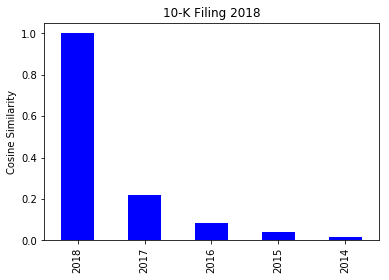

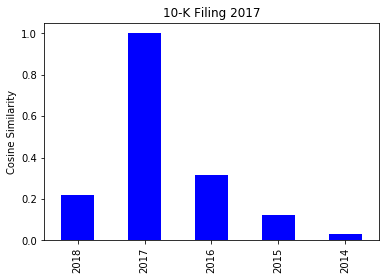

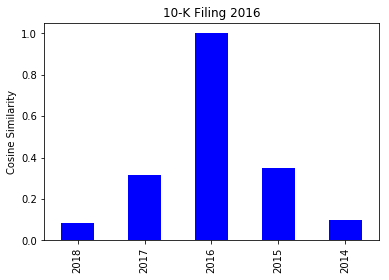

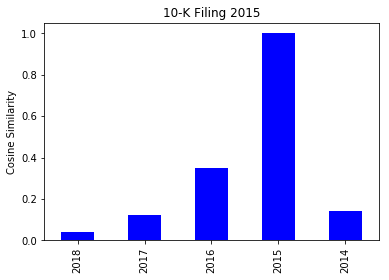

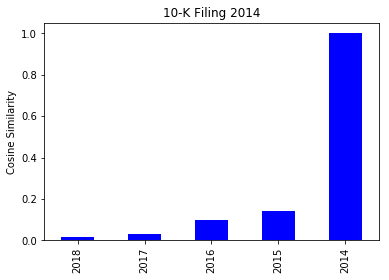

In [122]:
import matplotlib.pyplot as plt

for yr in similarity.index:
    similarity.loc[yr].plot(kind='bar', color='blue')
    plt.title("10-K Filing {}".format(yr))
    plt.ylabel("Cosine Similarity")
    plt.show()

In [123]:
yoy_similarity = pd.Series([similarity.loc[x,x+1] for x in [2017,2016,2015,2014]])
yoy_similarity.index = ['{}-{}'.format(x,x+1) for x in [2017,2016,2015,2014]]
print(yoy_similarity)

2017-2018    0.217534
2016-2017    0.314551
2015-2016    0.349458
2014-2015    0.139923
dtype: float64


In [124]:
#Let's see the most impactful words that either came on in the latest or were much more frequent
#As well as the opposite
print(tf_idf.diff(axis=1).dropna(axis=1).iloc[:,0].sort_values().head(10))
print()
print()
print(tf_idf.diff(axis=1).dropna(axis=1).iloc[:,0].sort_values(ascending=False).head(10))

index         -4.651874
act           -3.346732
repurchase    -2.883726
warehouse     -2.590290
implemented   -2.231155
autonomous    -2.231155
provisional   -2.231155
guidance      -2.231155
policy        -2.231155
award         -1.768148
Name: 2017, dtype: float64


deployed       1.768148
turkey         1.768148
taxation       1.115577
strengthen     1.115577
generation     1.115577
36             1.115577
legislative    1.115577
57             1.115577
adopting       1.115577
12             1.115577
Name: 2017, dtype: float64


In [135]:
#We see these words were specific only to one filing
print(counts.loc['autonomous'])
print()
print(counts.loc['turkey'])

2018    3
2017    0
2016    0
2015    0
2014    0
Name: autonomous, dtype: int64

2018    0
2017    2
2016    0
2015    0
2014    0
Name: turkey, dtype: int64


In [136]:
print(counts.loc['software'])
print()
print(tf_idf.loc['software'])

2018    17
2017    49
2016    50
2015    51
2014    53
Name: software, dtype: int64

2018    0.0
2017    0.0
2016    0.0
2015    0.0
2014    0.0
Name: software, dtype: float64


In [140]:
print(tf_log.loc['software'])
print()
print(idf.loc['software'])

2018    2.890372
2017    3.912023
2016    3.931826
2015    3.951244
2014    3.988984
Name: software, dtype: float64

0.0


# Risk Analysis

In [50]:
#An application of looking at these things is to see if there are companies that are becoming competitors
#Only in the most recent filing amazon comes up, but Oracle constantly mentions cloud
print(counts.loc["amazon"])
print(counts.loc["cloud"])
print()
print()
#Because cloud is mentioned in every documents it has no importance in the tf_idf
print(tf_idf.loc["amazon"])
print(tf_idf.loc["cloud"])

2018    1
2017    0
2016    0
2015    0
2014    0
Name: amazon, dtype: int64
2018    65
2017    61
2016    52
2015    48
2014    49
Name: cloud, dtype: int64


2018    1.115577
2017    0.000000
2016    0.000000
2015    0.000000
2014    0.000000
Name: amazon, dtype: float64
2018    0.0
2017    0.0
2016    0.0
2015    0.0
2014    0.0
Name: cloud, dtype: float64


In [51]:
#Pull the risk sections of Amazon and Oracle
documents_oracle = pull_10K("Oracle Corp", "0001341439")
documents_amazon = pull_10K("Amazon Com Inc", "0001018724")

risk_sections_oracle = [pull_risk_section(document) for document in documents_oracle]
risk_sections_amazon = [pull_risk_section(document) for document in documents_amazon]


In [64]:
#Parse each risk section
stemmer = nltk.stem.SnowballStemmer('english')
vectorizer = CountVectorizer(stop_words='english')
counts_oracle = vectorizer.fit_transform(risk_sections_oracle)
counts_oracle = pd.DataFrame(counts_oracle.toarray(),columns=vectorizer.get_feature_names()).transpose()
counts_oracle.columns = [2018,2017,2016,2015,2014]


counts_amazon = vectorizer.fit_transform(risk_sections_amazon)
counts_amazon = pd.DataFrame(counts_amazon.toarray(),columns=vectorizer.get_feature_names()).transpose()
counts_amazon.columns = [2018,2017,2016,2015,2014]


counts_amazon = counts_amazon.stack().reset_index()
counts_oracle = counts_oracle.stack().reset_index()

In [65]:
counts_amazon.columns = ["Word", "Time Period", "Count"]
counts_amazon["Company"] = "Amazon"
counts_oracle.columns = ["Word", "Time Period", "Count"]
counts_oracle["Company"] = "Oracle"
counts = pd.concat([counts_amazon, counts_oracle])
print(counts)

         Word  Time Period  Count Company
0     10table         2018      1  Amazon
1     10table         2017      1  Amazon
2     10table         2016      1  Amazon
3     10table         2015      1  Amazon
4     10table         2014      1  Amazon
5     11table         2018      1  Amazon
6     11table         2017      1  Amazon
7     11table         2016      1  Amazon
8     11table         2015      1  Amazon
9     11table         2014      1  Amazon
10    12table         2018      1  Amazon
11    12table         2017      1  Amazon
12    12table         2016      1  Amazon
13    12table         2015      1  Amazon
14    12table         2014      1  Amazon
15    13table         2018      1  Amazon
16    13table         2017      1  Amazon
17    13table         2016      1  Amazon
18    13table         2015      1  Amazon
19    13table         2014      1  Amazon
20    14table         2018      0  Amazon
21    14table         2017      1  Amazon
22    14table         2016      0 

In [66]:
#Now that we are combining the two together, something to consider is how idf will be impacted
#Before, it was a huge difference when Oracle had Amazon added to the risk section
#Now, however, the word will look much less important if IDF is done over the full document
print(counts[counts["Word"] == "amazon"])
print()
print()
#Likewise, Oracle as a word will now be more important because it is not featured in Amazon's 10-K
print(counts[counts["Word"] == "oracle"])

       Word  Time Period  Count Company
425  amazon         2018      5  Amazon
426  amazon         2017      5  Amazon
427  amazon         2016      5  Amazon
428  amazon         2015      5  Amazon
429  amazon         2014      5  Amazon
570  amazon         2018      1  Oracle
571  amazon         2017      0  Oracle
572  amazon         2016      0  Oracle
573  amazon         2015      0  Oracle
574  amazon         2014      0  Oracle


        Word  Time Period  Count Company
5795  oracle         2018     28  Oracle
5796  oracle         2017     29  Oracle
5797  oracle         2016     29  Oracle
5798  oracle         2015     28  Oracle
5799  oracle         2014     19  Oracle


In [67]:
counts = counts.set_index(["Company", "Time Period", "Word"])["Count"].unstack().transpose().fillna(0)
print(counts)

Company     Amazon                        Oracle                    
Time Period   2014  2015  2016  2017 2018   2014 2015 2016 2017 2018
Word                                                                
10table        1.0   1.0   1.0   1.0  1.0    0.0  0.0  0.0  0.0  0.0
11table        1.0   1.0   1.0   1.0  1.0    0.0  0.0  0.0  0.0  0.0
12             0.0   0.0   0.0   0.0  0.0    0.0  0.0  0.0  1.0  0.0
12table        1.0   1.0   1.0   1.0  1.0    0.0  0.0  0.0  0.0  0.0
13table        1.0   1.0   1.0   1.0  1.0    0.0  0.0  0.0  0.0  0.0
14             0.0   0.0   0.0   0.0  0.0    0.0  0.0  0.0  0.0  1.0
14table        0.0   0.0   0.0   1.0  0.0    0.0  0.0  0.0  0.0  0.0
15             0.0   0.0   0.0   0.0  0.0    0.0  0.0  0.0  0.0  1.0
16             0.0   0.0   0.0   0.0  0.0    0.0  0.0  0.0  0.0  1.0
17             0.0   0.0   0.0   0.0  0.0    0.0  0.0  0.0  0.0  2.0
18             0.0   0.0   0.0   0.0  0.0    2.0  1.0  1.0  1.0  1.0
19             0.0   0.0   0.0   0

In [68]:
tf_log = np.log(counts + 1)

n = (counts > 0).sum(axis=1)

idf = np.log(len(counts.columns) / n)
tf_idf = tf_log.multiply(idf, axis=0)
print(tf_idf)

Company        Amazon                                            Oracle  \
Time Period      2014      2015      2016      2017      2018      2014   
Word                                                                      
10table      0.480453  0.480453  0.480453  0.480453  0.480453  0.000000   
11table      0.480453  0.480453  0.480453  0.480453  0.480453  0.000000   
12           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12table      0.480453  0.480453  0.480453  0.480453  0.480453  0.000000   
13table      0.480453  0.480453  0.480453  0.480453  0.480453  0.000000   
14           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
14table      0.000000  0.000000  0.000000  1.596030  0.000000  0.000000   
15           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
16           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
17           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
18           0.000000  0.

In [69]:
#Let's find cosine similarity
similarity = cosine_similarity(tf_idf.transpose())
similarity = pd.DataFrame(similarity, index=tf_idf.columns,columns=tf_idf.columns)
print(similarity)

Company                Amazon                                          \
Time Period              2014      2015      2016      2017      2018   
Company Time Period                                                     
Amazon  2014         1.000000  0.949288  0.909757  0.676695  0.677021   
        2015         0.949288  1.000000  0.926841  0.684863  0.682113   
        2016         0.909757  0.926841  1.000000  0.714120  0.697585   
        2017         0.676695  0.684863  0.714120  1.000000  0.623660   
        2018         0.677021  0.682113  0.697585  0.623660  1.000000   
Oracle  2014         0.012158  0.012575  0.013020  0.023673  0.016233   
        2015         0.004812  0.005095  0.005220  0.017151  0.012894   
        2016         0.006156  0.006443  0.006662  0.018711  0.014877   
        2017         0.007156  0.008189  0.008368  0.028756  0.019834   
        2018         0.024158  0.019267  0.018630  0.056751  0.046559   

Company                Oracle                     

In [72]:
#And for each time period find the similarity between the two
yearly_sim = pd.Series([similarity.loc[("Amazon",x),("Oracle", x)] for x in [2018,2017,2016,2015,2014]], index=[2018,2017,2016,2015,2014])
print(yearly_sim)

2018    0.046559
2017    0.028756
2016    0.006662
2015    0.005095
2014    0.012158
dtype: float64


In [73]:
#We can see that amazon talks a lot more about the supply chain buzzwords
diff = tf_idf[("Amazon", 2018)] - tf_idf[("Oracle", 2018)]
print(diff.sort_values(ascending=False).head(10))
print()
print()
print(diff.sort_values().head(10))

Word
stores           5.301898
omnichannel      3.705868
controversies    2.529648
fulfillment      2.110302
content          1.963834
sellers          1.829255
online           1.662094
commerce         1.662094
obligationswe    1.596030
stolen           1.596030
dtype: float64


Word
index        -6.655327
repurchase   -4.125679
2018         -3.346732
policy       -3.192061
autonomous   -3.192061
cloud        -2.904047
warehouse    -2.590290
pressures    -2.529648
byol         -2.529648
learning     -2.529648
dtype: float64


In [74]:
#We see that two new words that amazon began using stores, and omnichannel became a big difference
#One limitation is that words are split
#So if amazon mentions whole foods it would be split losing the actual importance of it being a company
#rather than two distinct words
i = diff.sort_values(ascending=False).head(5).index
print(counts.loc[i])

Company       Amazon                         Oracle                    
Time Period     2014  2015  2016  2017  2018   2014 2015 2016 2017 2018
Word                                                                   
stores           0.0   0.0   0.0   0.0   9.0    0.0  0.0  0.0  0.0  0.0
omnichannel      0.0   0.0   0.0   0.0   4.0    0.0  0.0  0.0  0.0  0.0
controversies    0.0   0.0   0.0   0.0   2.0    0.0  0.0  0.0  0.0  0.0
fulfillment     20.0  20.0  20.0  20.0  20.0    0.0  0.0  0.0  0.0  0.0
content         16.0  16.0  16.0  16.0  16.0    0.0  0.0  0.0  0.0  0.0

In [75]:
#This analysis can be useful to assess country level threats
#And correlations in the currency markets
print(counts.loc[['yemen', 'turkey', 'china']])

Company     Amazon                     Oracle                    
Time Period   2014 2015 2016 2017 2018   2014 2015 2016 2017 2018
Word                                                             
yemen          0.0  0.0  0.0  0.0  0.0    0.0  1.0  0.0  0.0  0.0
turkey         0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  2.0  0.0
china          2.0  3.0  3.0  3.0  3.0    2.0  2.0  2.0  2.0  2.0


# Applied Sentiment Analysis

In [76]:
#The word list has multiple sheets with tone descriptions for different words
#Something to note is that a word can be in multiple lists!
import pandas as pd
word_list = pd.read_excel("Data/LM Word List.xlsx", sheet_name="Negative",header=None)
print(word_list)

                  0
0           ABANDON
1         ABANDONED
2        ABANDONING
3       ABANDONMENT
4      ABANDONMENTS
5          ABANDONS
6         ABDICATED
7         ABDICATES
8        ABDICATING
9        ABDICATION
10      ABDICATIONS
11         ABERRANT
12       ABERRATION
13     ABERRATIONAL
14      ABERRATIONS
15         ABETTING
16         ABNORMAL
17    ABNORMALITIES
18      ABNORMALITY
19       ABNORMALLY
20          ABOLISH
21        ABOLISHED
22        ABOLISHES
23       ABOLISHING
24         ABROGATE
25        ABROGATED
26        ABROGATES
27       ABROGATING
28       ABROGATION
29      ABROGATIONS
...             ...
2325         WEAKEN
2326       WEAKENED
2327      WEAKENING
2328        WEAKENS
2329         WEAKER
2330        WEAKEST
2331         WEAKLY
2332       WEAKNESS
2333     WEAKNESSES
2334      WILLFULLY
2335        WORRIES
2336          WORRY
2337       WORRYING
2338          WORSE
2339         WORSEN
2340       WORSENED
2341      WORSENING
2342        WORSENS


In [77]:
#Create a matrix of word types and the words that match these types
word_list = []
for sentiment_class in ["Negative", "Positive", "Uncertainty", "Litigious",
                       "StrongModal", "WeakModal", "Constraining"]:
    sentiment_list = pd.read_excel("Data/LM Word List.xlsx", sheet_name=sentiment_class,header=None)
    sentiment_list.columns = ["Word"]
    sentiment_list["Word"] = sentiment_list["Word"].str.lower()
    sentiment_list[sentiment_class] = 1
    sentiment_list = sentiment_list.set_index("Word")[sentiment_class]
    word_list.append(sentiment_list)
word_list = pd.concat(word_list, axis=1, sort=True).fillna(0)
print(word_list)

                Negative  Positive  Uncertainty  Litigious  StrongModal  \
abandon              1.0       0.0          0.0        0.0          0.0   
abandoned            1.0       0.0          0.0        0.0          0.0   
abandoning           1.0       0.0          0.0        0.0          0.0   
abandonment          1.0       0.0          0.0        0.0          0.0   
abandonments         1.0       0.0          0.0        0.0          0.0   
abandons             1.0       0.0          0.0        0.0          0.0   
abdicated            1.0       0.0          0.0        0.0          0.0   
abdicates            1.0       0.0          0.0        0.0          0.0   
abdicating           1.0       0.0          0.0        0.0          0.0   
abdication           1.0       0.0          0.0        0.0          0.0   
abdications          1.0       0.0          0.0        0.0          0.0   
aberrant             1.0       0.0          0.0        0.0          0.0   
aberration           1.0 

In [78]:
#Examples of words which have multiple groups
print(word_list.loc[word_list.sum(axis=1) > 1])

                  Negative  Positive  Uncertainty  Litigious  StrongModal  \
abrogate               1.0       0.0          0.0        1.0          0.0   
abrogated              1.0       0.0          0.0        1.0          0.0   
abrogates              1.0       0.0          0.0        1.0          0.0   
abrogating             1.0       0.0          0.0        1.0          0.0   
abrogation             1.0       0.0          0.0        1.0          0.0   
abrogations            1.0       0.0          0.0        1.0          0.0   
acquit                 1.0       0.0          0.0        1.0          0.0   
acquits                1.0       0.0          0.0        1.0          0.0   
acquittal              1.0       0.0          0.0        1.0          0.0   
acquittals             1.0       0.0          0.0        1.0          0.0   
acquitted              1.0       0.0          0.0        1.0          0.0   
acquitting             1.0       0.0          0.0        1.0          0.0   

In [80]:
#Let's reindex by negative words, as well as drop na, and see what negative words are mentioned
#We will look at percent frequency
tf_percent = counts / counts.sum()
negative_words = word_list[word_list["Negative"] == 1].index
negative_frequency = tf_percent.reindex(negative_words).dropna()
print(negative_frequency)

Company            Amazon                                            Oracle  \
Time Period          2014      2015      2016      2017      2018      2014   
accused          0.000286  0.000282  0.000278  0.000262  0.000277  0.000000   
adverse          0.000571  0.000565  0.000556  0.000523  0.000830  0.001486   
adversely        0.003999  0.003953  0.003616  0.002615  0.003043  0.006871   
allegations      0.000000  0.000000  0.000000  0.000000  0.000000  0.000186   
allege           0.000286  0.000282  0.000278  0.000262  0.000277  0.000000   
alleged          0.000286  0.000282  0.000278  0.000262  0.000277  0.000000   
antitrust        0.000000  0.000000  0.000000  0.000000  0.000000  0.000186   
bankruptcies     0.000286  0.000282  0.000278  0.000262  0.000277  0.000000   
breach           0.000286  0.000282  0.000278  0.000262  0.000277  0.000371   
breached         0.000286  0.000282  0.000278  0.000262  0.000277  0.000000   
breaches         0.001143  0.001129  0.001113  0.001

In [81]:
#There seems to be slightly higher negative term frequency for amazon, especially in the last few years
print("Year by Company negative word frequency")
print(negative_frequency.sum())
print()
print("Average company negative frequency")
print(negative_frequency.sum().groupby("Company").mean())

Year by Company negative word frequency
Company  Time Period
Amazon   2014           0.072836
         2015           0.072276
         2016           0.071766
         2017           0.067730
         2018           0.074136
Oracle   2014           0.069266
         2015           0.069066
         2016           0.070106
         2017           0.069035
         2018           0.070612
dtype: float64

Average company negative frequency
Company
Amazon    0.071749
Oracle    0.069617
dtype: float64


In [83]:
#Let's see what were the most common negative words in Amazon's latest risk section
negative_frequency.sort_values(by=("Amazon", 2018), ascending=False)

Company             Amazon                                            Oracle  \
Time Period           2014      2015      2016      2017      2018      2014   
unable            0.004284  0.004235  0.004172  0.003923  0.004426  0.001857   
adversely         0.003999  0.003953  0.003616  0.002615  0.003043  0.006871   
loss              0.003142  0.003106  0.003060  0.002877  0.003043  0.000929   
claims            0.003142  0.003106  0.003060  0.002877  0.003043  0.001857   
negatively        0.001999  0.001976  0.001947  0.001831  0.001936  0.001114   
harm              0.001714  0.001694  0.001669  0.001569  0.001936  0.000371   
difficulty        0.001714  0.001694  0.001669  0.001831  0.001936  0.000186   
failure           0.001143  0.001129  0.001669  0.001569  0.001936  0.000186   
damage            0.001428  0.001412  0.001391  0.001308  0.001660  0.000557   
penalties         0.001143  0.001129  0.001391  0.001308  0.001107  0.000929   
impairment        0.001143  0.001129  0.001113  0.001046  0.001107  0.000557   
unlawful          0.001143  0.001129  0.001113  0.001046  0.001107  0.000000   
losses            0.001143  0.001129  0.001113  0.001046  0.001107  0.001671   
breaches          0.001143  0.001129  0.001113  0.001046  0.001107  0.000000   
delays            0.000857  0.000847  0.000834  0.000785  0.000830  0.002228   
interruptions     0.000857  0.000847  0.000834  0.000785  0.000830  0.000000   
criminal          0.000857  0.000847  0.000834  0.000785  0.000830  0.000371   
adverse           0.000571  0.000565  0.000556  0.000523  0.000830  0.001486   
strain            0.000857  0.000847  0.000834  0.000785  0.000830  0.000000   
diminish          0.000857  0.000847  0.000834  0.000785  0.000830  0.000000   
lack              0.000857  0.000847  0.000834  0.000785  0.000830  0.000000   
expose            0.000857  0.000847  0.000834  0.000785  0.000830  0.000557   
difficult         0.000857  0.000847  0.000834  0.000785  0.000830  0.000743   
fines             0.000857  0.000847  0.000834  0.000785  0.000830  0.000557   
unfavorable       0.000571  0.000565  0.000556  0.000785  0.000830  0.000371   
unsuccessful      0.000857  0.000847  0.000834  0.000785  0.000830  0.000000   
exposed           0.000571  0.000565  0.000556  0.000523  0.000553  0.000000   
infringing        0.000571  0.000565  0.000556  0.000523  0.000553  0.000000   
terminated        0.000571  0.000565  0.000556  0.000523  0.000553  0.000371   
disruptions       0.000571  0.000565  0.000556  0.000523  0.000553  0.000743   
...                    ...       ...       ...       ...       ...       ...   
flaws             0.000000  0.000000  0.000000  0.000000  0.000000  0.000371   
invalidated       0.000000  0.000000  0.000000  0.000000  0.000000  0.000186   
investigate       0.000000  0.000000  0.000000  0.000000  0.000000  0.000186   
deterioration     0.000000  0.000000  0.000000  0.000000  0.000000  0.000186   
obsolete          0.000000  0.000000  0.000000  0.000000  0.000000  0.000186   
restructurings    0.000000  0.000000  0.000000  0.000000  0.000000  0.000743   
restructuring     0.000000  0.000000  0.000000  0.000000  0.000000  0.000371   
restructured      0.000000  0.000000  0.000000  0.000000  0.000000  0.000186   
crises            0.000000  0.000000  0.000000  0.000000  0.000000  0.000186   
rejected          0.000000  0.000000  0.000000  0.000262  0.000000  0.000186   
curtailment       0.000000  0.000000  0.000000  0.000000  0.000000  0.000186   
problem           0.000000  0.000000  0.000000  0.000000  0.000000  0.000186   
preclude          0.000000  0.000000  0.000000  0.000000  0.000000  0.000186   
poorly            0.000000  0.000000  0.000000  0.000000  0.000000  0.000186   
overturn          0.000000  0.000000  0.000000  0.000262  0.000000  0.000000   
declined          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
declining         0.000000  0.000000  0.000000  0.000000  0.000000  0.000186   


In [84]:
#And for all word types.....
l = []
for word_type in word_list.columns:
    word_type_list = word_list[word_list[word_type] == 1].index
    word_type_frequency = tf_percent.reindex(word_type_list).dropna().sum()
    l.append(word_type_frequency)
word_type_frequency = pd.concat(l, axis=1)
word_type_frequency.columns = word_list.columns
print(word_type_frequency)

                     Negative  Positive  Uncertainty  Litigious  StrongModal  \
Company Time Period                                                            
Amazon  2014         0.072836  0.023136     0.018280   0.035133     0.000286   
        2015         0.072276  0.023151     0.018069   0.035291     0.000282   
        2016         0.071766  0.022809     0.017803   0.036439     0.000278   
        2017         0.067730  0.021705     0.018044   0.037134     0.000262   
        2018         0.074136  0.022130     0.017981   0.031535     0.000277   
Oracle  2014         0.069266  0.020427     0.023027   0.022656     0.000000   
        2015         0.069066  0.018601     0.021529   0.025146     0.000000   
        2016         0.070106  0.019026     0.021426   0.025369     0.000000   
        2017         0.069035  0.018097     0.021448   0.026475     0.000168   
        2018         0.070612  0.016996     0.021632   0.028585     0.000155   

                     WeakModal  Constra